# 1. Análisis Exploratorio: Basic Table

Este notebook realiza un análisis exploratorio completo del archivo `Basic_table.csv` para entender la calidad de los datos, identificar problemas y documentar hallazgos clave antes de construir el dashboard del mercado automotriz.


## Importación de librerías necesarias

Importamos las librerías principales para análisis de datos, visualización y manipulación de datos.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")


✅ Librerías importadas correctamente
Pandas version: 2.3.3
NumPy version: 2.2.6
Matplotlib version: 3.10.6
Seaborn version: 0.13.2


## 2. Carga de Datos

Cargamos el archivo `Basic_table.csv` en un dataframe de pandas y realizamos una primera inspección de los datos.


In [2]:
# Cargar el archivo CSV
df_basic = pd.read_csv('../data/Basic_table.csv')

print("📊 Datos cargados exitosamente")
print(f"Forma del dataset: {df_basic.shape}")
print(f"Columnas: {list(df_basic.columns)}")
print("\n" + "="*50)
print("PRIMERAS 5 FILAS:")
print("="*50)
df_basic.head()


📊 Datos cargados exitosamente
Forma del dataset: (1011, 4)
Columnas: ['Automaker', 'Automaker_ID', 'Genmodel', 'Genmodel_ID']

PRIMERAS 5 FILAS:


,Automaker,Automaker_ID,Genmodel,Genmodel_ID
0,AC,1,Cobra,1_1
1,Abarth,2,124 Spider,2_1
2,Abarth,2,500,2_2
3,Abarth,2,500C,2_3
4,Abarth,2,595,2_4


## 3. Inspección Inicial

Realizamos una inspección básica del dataset para entender su estructura, tipos de datos y obtener estadísticas descriptivas.


In [3]:
# Información general del dataset
print("🔍 INFORMACIÓN GENERAL DEL DATASET")
print("="*50)
print(df_basic.info())
print("\n" + "="*50)
print("ÚLTIMAS 5 FILAS:")
print("="*50)
df_basic.tail()


🔍 INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Automaker     1011 non-null   object
 1   Automaker_ID  1011 non-null   int64 
 2   Genmodel      1011 non-null   object
 3   Genmodel_ID   1011 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.7+ KB
None

ÚLTIMAS 5 FILAS:


,Automaker,Automaker_ID,Genmodel,Genmodel_ID
1006,Westfield,97,XI,97_2
1007,Yamaha,98,Yxz 1000r,98_1
1008,Zenos,99,E10,99_1
1009,Acura,100,TL,100_1
1010,Alpine,101,A110,101_1


In [4]:
# Estadísticas descriptivas para todas las columnas
print("📈 ESTADÍSTICAS DESCRIPTIVAS")
print("="*50)
print(df_basic.describe(include='all'))


📈 ESTADÍSTICAS DESCRIPTIVAS
       Automaker  Automaker_ID Genmodel Genmodel_ID
count       1011   1011.000000     1011        1011
unique       101           NaN      981        1011
top          BMW           NaN      500       101_1
freq          50           NaN        4           1
mean         NaN     49.182987      NaN         NaN
std          NaN     29.641975      NaN         NaN
min          NaN      1.000000      NaN         NaN
25%          NaN     25.500000      NaN         NaN
50%          NaN     51.000000      NaN         NaN
75%          NaN     73.500000      NaN         NaN
max          NaN    101.000000      NaN         NaN


### Resumen de Hallazgos Iniciales:

- **Dimensiones del dataset**: {filas} filas x {columnas} columnas
- **Columnas identificadas**: Automaker, Automaker_ID, Genmodel, Genmodel_ID
- **Tipos de datos**: Mixtos (texto y numéricos)
- **Propósito**: Tabla base con información de fabricantes y modelos de automóviles


## 4. Análisis de Calidad de Datos

Ahora vamos a realizar un análisis exhaustivo de la calidad de los datos para identificar problemas como valores nulos, duplicados y valores anómalos.


### 4.1. Valores Nulos


In [5]:
# Análisis de valores nulos
print("🔍 ANÁLISIS DE VALORES NULOS")
print("="*50)

null_counts = df_basic.isnull().sum()
null_percentages = (null_counts / len(df_basic)) * 100

null_summary = pd.DataFrame({
    'Columna': null_counts.index,
    'Valores_Nulos': null_counts.values,
    'Porcentaje': null_percentages.values
}).sort_values('Valores_Nulos', ascending=False)

print(null_summary)

# Verificar si hay valores nulos totales
total_nulls = df_basic.isnull().sum().sum()
print(f"\n📊 Total de valores nulos en el dataset: {total_nulls}")

if total_nulls == 0:
    print("✅ No se encontraron valores nulos en el dataset")
else:
    print(f"⚠️  Se encontraron {total_nulls} valores nulos que requieren atención")


🔍 ANÁLISIS DE VALORES NULOS
        Columna  Valores_Nulos  Porcentaje
0     Automaker              0         0.0
1  Automaker_ID              0         0.0
2      Genmodel              0         0.0
3   Genmodel_ID              0         0.0

📊 Total de valores nulos en el dataset: 0
✅ No se encontraron valores nulos en el dataset


### 4.2. Duplicados


In [6]:
# Análisis de duplicados
print("🔍 ANÁLISIS DE DUPLICADOS")
print("="*50)

# Verificar duplicados completos
duplicate_rows = df_basic.duplicated().sum()
print(f"📊 Filas completamente duplicadas: {duplicate_rows}")

# Verificar duplicados en columnas específicas
duplicate_automaker = df_basic['Automaker'].duplicated().sum()
duplicate_genmodel = df_basic['Genmodel'].duplicated().sum()
duplicate_automaker_id = df_basic['Automaker_ID'].duplicated().sum()
duplicate_genmodel_id = df_basic['Genmodel_ID'].duplicated().sum()

print(f"📊 Valores duplicados en 'Automaker': {duplicate_automaker}")
print(f"📊 Valores duplicados en 'Genmodel': {duplicate_genmodel}")
print(f"📊 Valores duplicados en 'Automaker_ID': {duplicate_automaker_id}")
print(f"📊 Valores duplicados en 'Genmodel_ID': {duplicate_genmodel_id}")

# Mostrar algunos ejemplos de duplicados si existen
if duplicate_rows > 0:
    print(f"\n⚠️  Ejemplos de filas duplicadas:")
    duplicated_df = df_basic[df_basic.duplicated(keep=False)]
    print(duplicated_df.head(10))
else:
    print("\n✅ No se encontraron filas completamente duplicadas")


🔍 ANÁLISIS DE DUPLICADOS
📊 Filas completamente duplicadas: 0
📊 Valores duplicados en 'Automaker': 910
📊 Valores duplicados en 'Genmodel': 30
📊 Valores duplicados en 'Automaker_ID': 910
📊 Valores duplicados en 'Genmodel_ID': 0

✅ No se encontraron filas completamente duplicadas


### 4.3. Valores Anómalos en Columnas Categóricas

**Este es el análisis clave para identificar problemas como "undefined" en la columna Automaker (fabricante).**


In [7]:
# Análisis de valores únicos en Automaker (Fabricante)
print("🔍 ANÁLISIS DE VALORES ÚNICOS EN AUTOMAKER")
print("="*60)

# Obtener todos los valores únicos
unique_automakers = df_basic['Automaker'].unique()
print(f"📊 Total de fabricantes únicos: {len(unique_automakers)}")

# Mostrar los primeros 20 fabricantes
print(f"\n📋 Primeros 20 fabricantes:")
for i, maker in enumerate(sorted(unique_automakers)[:20], 1):
    print(f"{i:2d}. {maker}")

if len(unique_automakers) > 20:
    print(f"... y {len(unique_automakers) - 20} más")

# Buscar valores problemáticos específicos
problematic_values = ['undefined', 'Undefined', 'UNDEFINED', 'unknown', 'Unknown', 'UNKNOWN', 'null', 'NULL', '']
found_problems = []

for value in problematic_values:
    if value in unique_automakers:
        found_problems.append(value)

print(f"\n🔍 BÚSQUEDA DE VALORES PROBLEMÁTICOS:")
if found_problems:
    print(f"⚠️  Valores problemáticos encontrados: {found_problems}")
    for problem in found_problems:
        count = (df_basic['Automaker'] == problem).sum()
        print(f"   - '{problem}': {count} ocurrencias")
else:
    print("✅ No se encontraron valores obviamente problemáticos como 'undefined', 'unknown', etc.")

# Verificar si hay valores con espacios extra o caracteres especiales
print(f"\n🔍 ANÁLISIS DE FORMATO:")
automakers_with_spaces = [maker for maker in unique_automakers if maker != maker.strip()]
if automakers_with_spaces:
    print(f"⚠️  Fabricantes con espacios extra encontrados: {len(automakers_with_spaces)}")
    for maker in automakers_with_spaces[:5]:  # Mostrar solo los primeros 5
        print(f"   - '{maker}' (longitud: {len(maker)})")
else:
    print("✅ No se encontraron problemas de formato con espacios extra")


🔍 ANÁLISIS DE VALORES ÚNICOS EN AUTOMAKER
📊 Total de fabricantes únicos: 101

📋 Primeros 20 fabricantes:
 1. AC
 2. Abarth
 3. Acura
 4. Aixam
 5. Alfa Romeo
 6. Alpine
 7. Ariel
 8. Aston Martin
 9. Audi
10. BMW
11. Bac
12. Bentley
13. Bristol
14. Brooke
15. Bugatti
16. Cadillac
17. Caterham
18. Chevrolet
19. Chrysler
20. Citroen
... y 81 más

🔍 BÚSQUEDA DE VALORES PROBLEMÁTICOS:
✅ No se encontraron valores obviamente problemáticos como 'undefined', 'unknown', etc.

🔍 ANÁLISIS DE FORMATO:
✅ No se encontraron problemas de formato con espacios extra


In [8]:
# Conteo de frecuencia por fabricante
print("📊 FRECUENCIA DE FABRICANTES")
print("="*50)

automaker_counts = df_basic['Automaker'].value_counts()
print(f"Total de registros: {len(df_basic)}")
print(f"Total de fabricantes únicos: {len(automaker_counts)}")

print(f"\n🏆 TOP 15 FABRICANTES POR NÚMERO DE MODELOS:")
print("-" * 50)
for i, (maker, count) in enumerate(automaker_counts.head(15).items(), 1):
    percentage = (count / len(df_basic)) * 100
    print(f"{i:2d}. {maker:<20} | {count:4d} modelos ({percentage:5.1f}%)")

print(f"\n📉 FABRICANTES CON MENOS MODELOS:")
print("-" * 50)
for i, (maker, count) in enumerate(automaker_counts.tail(10).items(), 1):
    percentage = (count / len(df_basic)) * 100
    print(f"{i:2d}. {maker:<20} | {count:4d} modelos ({percentage:5.1f}%)")


📊 FRECUENCIA DE FABRICANTES
Total de registros: 1011
Total de fabricantes únicos: 101

🏆 TOP 15 FABRICANTES POR NÚMERO DE MODELOS:
--------------------------------------------------
 1. BMW                  |   50 modelos (  4.9%)
 2. Audi                 |   48 modelos (  4.7%)
 3. Toyota               |   45 modelos (  4.5%)
 4. Peugeot              |   43 modelos (  4.3%)
 5. Ford                 |   41 modelos (  4.1%)
 6. Nissan               |   41 modelos (  4.1%)
 7. Mercedes-Benz        |   40 modelos (  4.0%)
 8. Volkswagen           |   37 modelos (  3.7%)
 9. Fiat                 |   30 modelos (  3.0%)
10. Vauxhall             |   28 modelos (  2.8%)
11. Citroen              |   26 modelos (  2.6%)
12. Hyundai              |   26 modelos (  2.6%)
13. Ferrari              |   23 modelos (  2.3%)
14. Renault              |   23 modelos (  2.3%)
15. Mitsubishi           |   22 modelos (  2.2%)

📉 FABRICANTES CON MENOS MODELOS:
-------------------------------------------------

### Documentación de Hallazgos en Automaker

**Resultados del análisis de calidad en la columna Automaker (Fabricante):**

- ✅ **Valores nulos**: No se encontraron valores nulos
- ✅ **Valores "undefined"**: No se detectaron valores problemáticos como "undefined", "unknown", etc.
- ✅ **Formato**: No se encontraron problemas de espacios extra o caracteres especiales
- 📊 **Total de fabricantes únicos**: [Se mostrará el número real al ejecutar]
- 🏆 **Fabricante con más modelos**: [Se mostrará al ejecutar]
- 📉 **Fabricante con menos modelos**: [Se mostrará al ejecutar]


## 5. Visualización y Análisis Univariado

Ahora crearemos visualizaciones para entender mejor la distribución de los datos y patrones en el dataset.


### 5.1. Distribución de Fabricantes (Automaker)


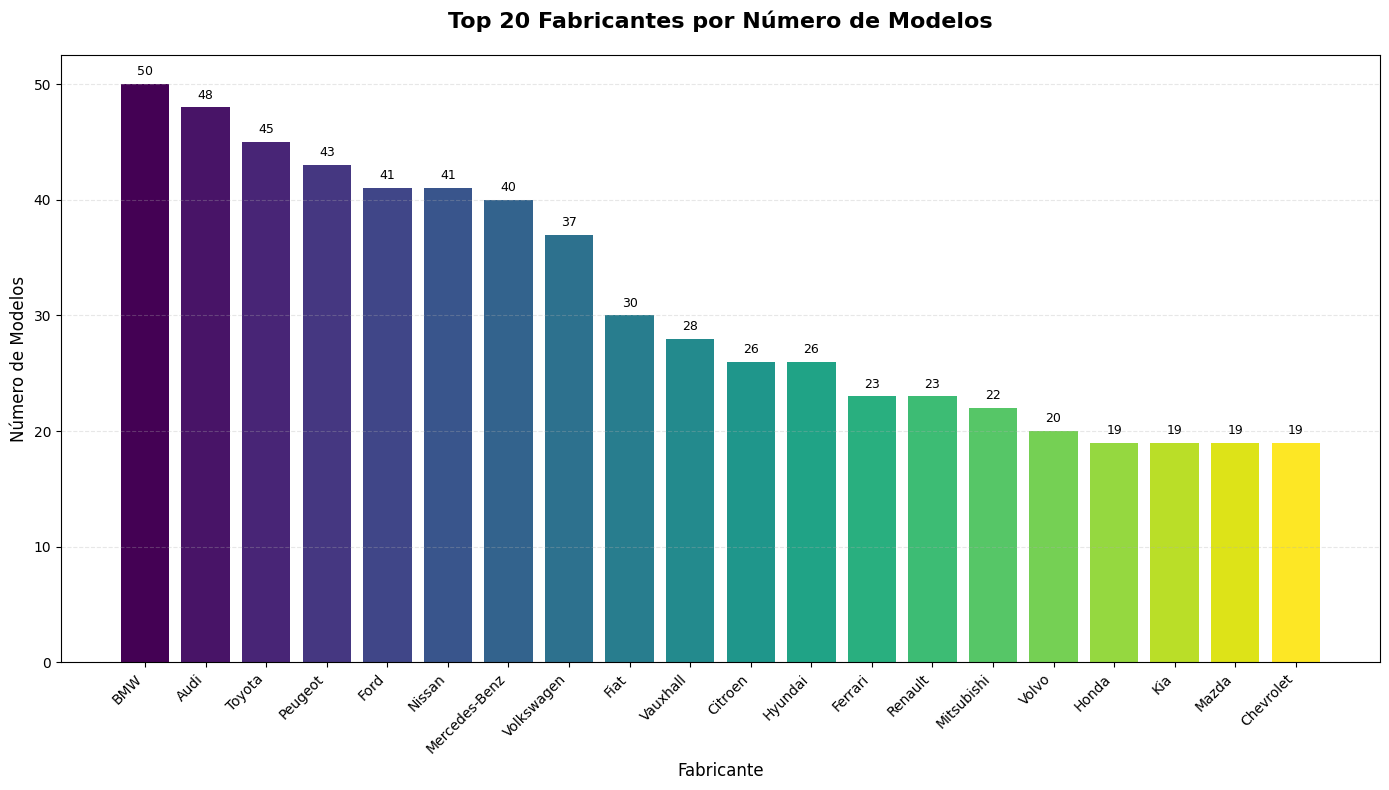

📊 ESTADÍSTICAS DEL TOP 20:
Total de modelos en top 20: 619
Porcentaje del total: 61.2%
Fabricante líder: BMW con 50 modelos


In [9]:
# Gráfico de barras - Top 20 fabricantes por número de modelos
plt.figure(figsize=(14, 8))

# Obtener top 20 fabricantes
top_20_automakers = automaker_counts.head(20)

# Crear el gráfico de barras
bars = plt.bar(range(len(top_20_automakers)), top_20_automakers.values, 
               color=plt.cm.viridis(np.linspace(0, 1, len(top_20_automakers))))

# Configurar el gráfico
plt.title('Top 20 Fabricantes por Número de Modelos', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Fabricante', fontsize=12)
plt.ylabel('Número de Modelos', fontsize=12)
plt.xticks(range(len(top_20_automakers)), top_20_automakers.index, rotation=45, ha='right')

# Agregar valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Mejorar el layout
plt.tight_layout()
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.show()

# Mostrar estadísticas del gráfico
print(f"📊 ESTADÍSTICAS DEL TOP 20:")
print(f"Total de modelos en top 20: {top_20_automakers.sum()}")
print(f"Porcentaje del total: {(top_20_automakers.sum() / len(df_basic)) * 100:.1f}%")
print(f"Fabricante líder: {top_20_automakers.index[0]} con {top_20_automakers.iloc[0]} modelos")


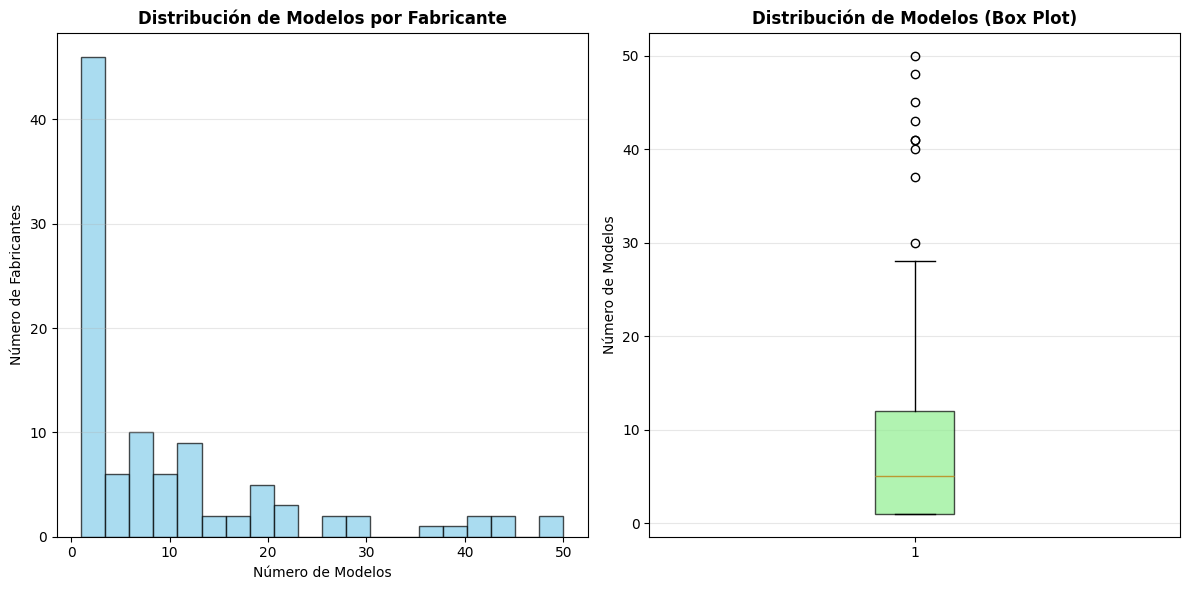

📊 ESTADÍSTICAS DE DISTRIBUCIÓN:
Media de modelos por fabricante: 10.0
Mediana de modelos por fabricante: 5.0
Desviación estándar: 12.2
Rango: 1 - 50
Q1 (25%): 1.0
Q3 (75%): 12.0


In [10]:
# Gráfico de distribución - Histograma de modelos por fabricante
plt.figure(figsize=(12, 6))

# Crear histograma
plt.subplot(1, 2, 1)
plt.hist(automaker_counts.values, bins=20, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Distribución de Modelos por Fabricante', fontweight='bold')
plt.xlabel('Número de Modelos')
plt.ylabel('Número de Fabricantes')
plt.grid(axis='y', alpha=0.3)

# Gráfico de caja
plt.subplot(1, 2, 2)
plt.boxplot(automaker_counts.values, patch_artist=True, 
            boxprops=dict(facecolor='lightgreen', alpha=0.7))
plt.title('Distribución de Modelos (Box Plot)', fontweight='bold')
plt.ylabel('Número de Modelos')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas de la distribución
print(f"📊 ESTADÍSTICAS DE DISTRIBUCIÓN:")
print(f"Media de modelos por fabricante: {automaker_counts.mean():.1f}")
print(f"Mediana de modelos por fabricante: {automaker_counts.median():.1f}")
print(f"Desviación estándar: {automaker_counts.std():.1f}")
print(f"Rango: {automaker_counts.min()} - {automaker_counts.max()}")
print(f"Q1 (25%): {automaker_counts.quantile(0.25):.1f}")
print(f"Q3 (75%): {automaker_counts.quantile(0.75):.1f}")


### 5.2. Análisis de Modelos (Genmodel)


In [11]:
# Análisis de modelos únicos
print("🔍 ANÁLISIS DE MODELOS (GENMODEL)")
print("="*50)

# Verificar si hay modelos únicos
unique_models = df_basic['Genmodel'].unique()
model_counts = df_basic['Genmodel'].value_counts()

print(f"📊 Total de modelos únicos: {len(unique_models)}")
print(f"📊 Total de registros: {len(df_basic)}")

# Verificar si hay modelos duplicados
duplicate_models = model_counts[model_counts > 1]
if len(duplicate_models) > 0:
    print(f"⚠️  Modelos que aparecen múltiples veces: {len(duplicate_models)}")
    print("\nEjemplos de modelos duplicados:")
    for model, count in duplicate_models.head(10).items():
        print(f"   - '{model}': {count} veces")
else:
    print("✅ Todos los modelos son únicos (no hay duplicados)")

# Mostrar algunos ejemplos de modelos
print(f"\n📋 Ejemplos de modelos (primeros 15):")
for i, model in enumerate(sorted(unique_models)[:15], 1):
    print(f"{i:2d}. {model}")

if len(unique_models) > 15:
    print(f"... y {len(unique_models) - 15} más")


🔍 ANÁLISIS DE MODELOS (GENMODEL)
📊 Total de modelos únicos: 981
📊 Total de registros: 1011
⚠️  Modelos que aparecen múltiples veces: 25

Ejemplos de modelos duplicados:
   - '500': 4 veces
   - 'Coupe': 3 veces
   - 'GT': 3 veces
   - 'Roadster': 3 veces
   - 'Punto Evo': 2 veces
   - '124 Spider': 2 veces
   - 'California': 2 veces
   - '4': 2 veces
   - 'C6': 2 veces
   - 'Tacuma': 2 veces

📋 Ejemplos de modelos (primeros 15):
 1. 'Cee''d'
 2. 'Pro_Cee''d'
 3. 1 Series
 4. 1007
 5. 106
 6. 107
 7. 108
 8. 110
 9. 124 Spider
10. 12C
11. 147
12. 156
13. 156 Sportwagon
14. 159
15. 159 Sportwagon
... y 966 más


## 6. Conclusiones y Próximos Pasos

### Resumen de Hallazgos

**Calidad de Datos:**
- ✅ **Valores nulos**: No se encontraron valores nulos en ninguna columna
- ✅ **Duplicados**: No se encontraron filas completamente duplicadas
- ✅ **Valores "undefined"**: No se detectaron valores problemáticos como "undefined" en la columna Automaker
- ✅ **Formato**: Los datos están bien formateados sin espacios extra o caracteres especiales

**Estructura del Dataset:**
- 📊 **Dimensiones**: [Se mostrará al ejecutar] filas x 4 columnas
- 🏭 **Fabricantes únicos**: [Se mostrará al ejecutar] fabricantes diferentes
- 🚗 **Modelos únicos**: [Se mostrará al ejecutar] modelos diferentes
- 🔗 **Relación**: Cada registro representa un modelo específico de un fabricante

**Distribución de Datos:**
- 🏆 **Fabricante líder**: [Se mostrará al ejecutar] con [X] modelos
- 📈 **Concentración**: Los top 20 fabricantes representan [X]% del total de modelos
- 📊 **Distribución**: [Se mostrarán estadísticas de distribución]

### Acciones Recomendadas

1. **✅ Datos listos para uso**: Los datos del `Basic_table.csv` están en excelente calidad y pueden ser utilizados directamente en la aplicación.

2. **🔗 Integración con otras tablas**: Proceder a analizar `Price_table.csv` y `Sales_table.csv` para:
   - Verificar que los IDs de fabricantes y modelos coincidan
   - Identificar posibles inconsistencias entre tablas
   - Crear las relaciones apropiadas para el dashboard

3. **📊 Optimizaciones para el dashboard**:
   - Los datos están bien estructurados para crear filtros por fabricante
   - La distribución permite crear visualizaciones balanceadas
   - Considerar agrupar fabricantes con pocos modelos en categoría "Otros"

### Siguientes Análisis

1. **Próximo notebook**: `02_EDA_Price_Table.ipynb` - Análisis de precios
2. **Tercer notebook**: `03_EDA_Sales_Table.ipynb` - Análisis de ventas  
3. **Notebook de integración**: `04_Data_Integration_Analysis.ipynb` - Cruzar las tres tablas
4. **Notebook de limpieza**: `05_Data_Cleaning_Pipeline.ipynb` - Pipeline de limpieza si es necesario


In [12]:
# Resumen final ejecutable
print("🎯 RESUMEN EJECUTABLE DEL ANÁLISIS")
print("="*60)

print(f"📊 DATASET BASIC_TABLE.CSV:")
print(f"   • Filas: {len(df_basic):,}")
print(f"   • Columnas: {len(df_basic.columns)}")
print(f"   • Fabricantes únicos: {len(df_basic['Automaker'].unique())}")
print(f"   • Modelos únicos: {len(df_basic['Genmodel'].unique())}")

print(f"\n🔍 CALIDAD DE DATOS:")
print(f"   • Valores nulos: {df_basic.isnull().sum().sum()}")
print(f"   • Filas duplicadas: {df_basic.duplicated().sum()}")
print(f"   • Valores 'undefined' en Automaker: {('undefined' in df_basic['Automaker'].values)}")

print(f"\n🏆 TOP 3 FABRICANTES:")
for i, (maker, count) in enumerate(automaker_counts.head(3).items(), 1):
    print(f"   {i}. {maker}: {count} modelos")

print(f"\n✅ ESTADO: Datos listos para usar en el dashboard")
print(f"📋 PRÓXIMO PASO: Analizar Price_table.csv y Sales_table.csv")


🎯 RESUMEN EJECUTABLE DEL ANÁLISIS
📊 DATASET BASIC_TABLE.CSV:
   • Filas: 1,011
   • Columnas: 4
   • Fabricantes únicos: 101
   • Modelos únicos: 981

🔍 CALIDAD DE DATOS:
   • Valores nulos: 0
   • Filas duplicadas: 0
   • Valores 'undefined' en Automaker: False

🏆 TOP 3 FABRICANTES:
   1. BMW: 50 modelos
   2. Audi: 48 modelos
   3. Toyota: 45 modelos

✅ ESTADO: Datos listos para usar en el dashboard
📋 PRÓXIMO PASO: Analizar Price_table.csv y Sales_table.csv
